# Correlation analysis for dosage compensation

In [1]:
library(ggpubr)
library(tidyverse)

Loading required package: ggplot2

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.1     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [25]:
save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}


plot_scatter <- function(gene){
    sp = ggscatter(df, x=gene, y="RXE", add="reg.line", ylab="Relative X Expression",
               add.params = list(color = "blue", fill = "lightgray"), conf.int = TRUE, 
               cor.method = "pearson", cor.coef = TRUE, cor.coef.size = 7, 
               cor.coeff.args = list(label.sep = "\n")) + 
    #stat_cor(aes(label = paste0(..rr.label..,'\n', ..p.label..)), size=8,method = "pearson") + 
    font("xylab", size = 20, face='bold') + font("xy.text", size = 18)
    save_ggplots(paste(gene, "RXE_correlation", sep='_'), sp, 7, 7)
    return(sp)
}


## Load relative X expression for female samples

In [2]:
rxe = data.table::fread("../../_m/RXE_public.csv") %>% 
    column_to_rownames(var="V1")
rxe %>% head(2)

,X,autosome,sample,RXE
,<dbl>,<dbl>,<chr>,<dbl>
ERR2278290,2.973530,2.804346,ERR2278290,0.1691840
ERR2278298,2.970653,2.805367,ERR2278298,0.1652865


## Load gene annotation

In [3]:
deg_file = paste0('../../../hisat2/featureCounts/annotate/differential_expression/', 
                  'analysis/iter_analysis/_m/hiPSC_cell_line_median_iteration_full.txt')
deg = data.table::fread(deg_file) %>%
    filter(Symbol %in% c("XIST", "XACT")) %>%
    rename('gencodeID'='Geneid')
deg$Symbol = fct_drop(deg$Symbol)
deg

gencodeID,Symbol,chr,AveExpr,logFC,P.Value,adj.P.Val,Binominal_Enrichment
<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000229807.12,XIST,chrX,2.0837171,-7.9946147,3.004999e-18,1.208885e-15,7.888609e-31
ENSG00000241743.3,XACT,chrX,-0.2508249,-0.8731578,1.056283e-09,1.691391e-07,7.888609e-31


## Load median normalized voom expression (log2(CPM + 0.5))

In [4]:
iter = list()
for(ii in 1:100){
    load(paste0("../../../hisat2/featureCounts/annotate/differential_expression/_m/cell_line/iteration_",
                ii,"/voomSVA.RData"))
    iter[[ii]] <- data.frame(v$E)[deg$gencodeID, ]
}

expr = do.call(cbind, iter)
dim(expr)

In [11]:
xexpr = expr %>% t %>% as.data.frame %>% 
    rownames_to_column() %>% rename("SampleID"="rowname") 
xexpr$SampleID = gsub("\\..*", "", xexpr$SampleID)
xexpr = xexpr %>% mutate_at("SampleID", as.factor) %>% 
    group_by(SampleID) %>% 
    summarise(XACT=median(ENSG00000241743.3), XIST=median(ENSG00000229807.12))
xexpr %>% head(2)

`summarise()` ungrouping output (override with `.groups` argument)



SampleID,XACT,XIST
<fct>,<dbl>,<dbl>
ERR1203451,-0.6326011,-4.720064
ERR1203452,-0.2188512,-3.026206


In [18]:
df = rxe %>% inner_join(xexpr, by=c("sample"='SampleID'))
df %>% head(2)

,X,autosome,sample,RXE,XACT,XIST
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,2.970653,2.805367,ERR2278298,0.16528652,0.1843625,3.795575
2,2.899868,2.831175,ERR2278283,0.06869337,-0.3660905,6.677366


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



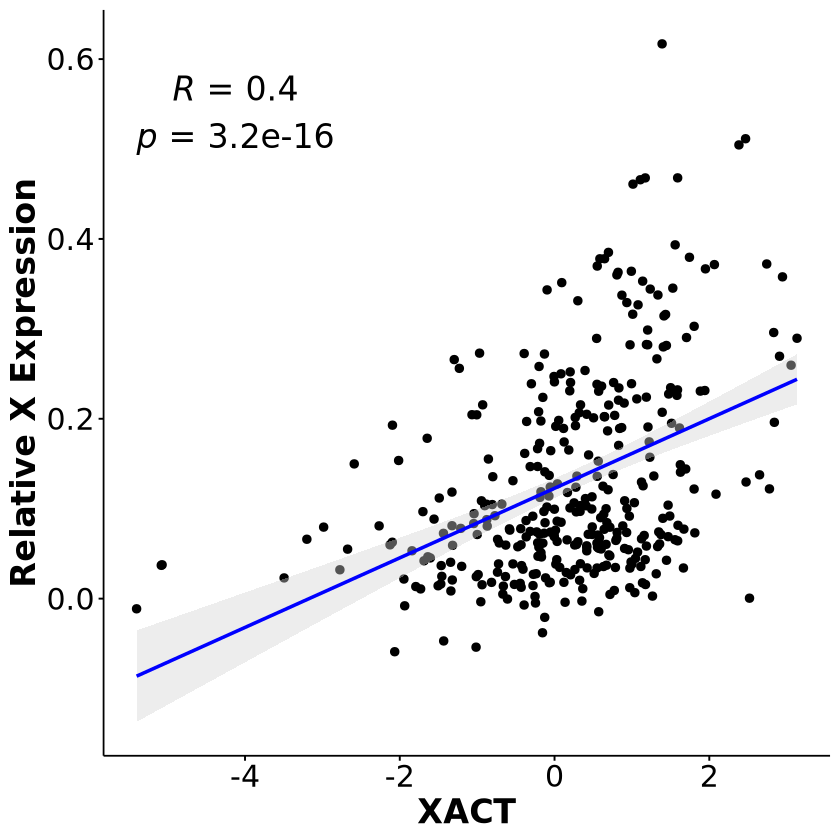

In [26]:
plot_scatter("XACT")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



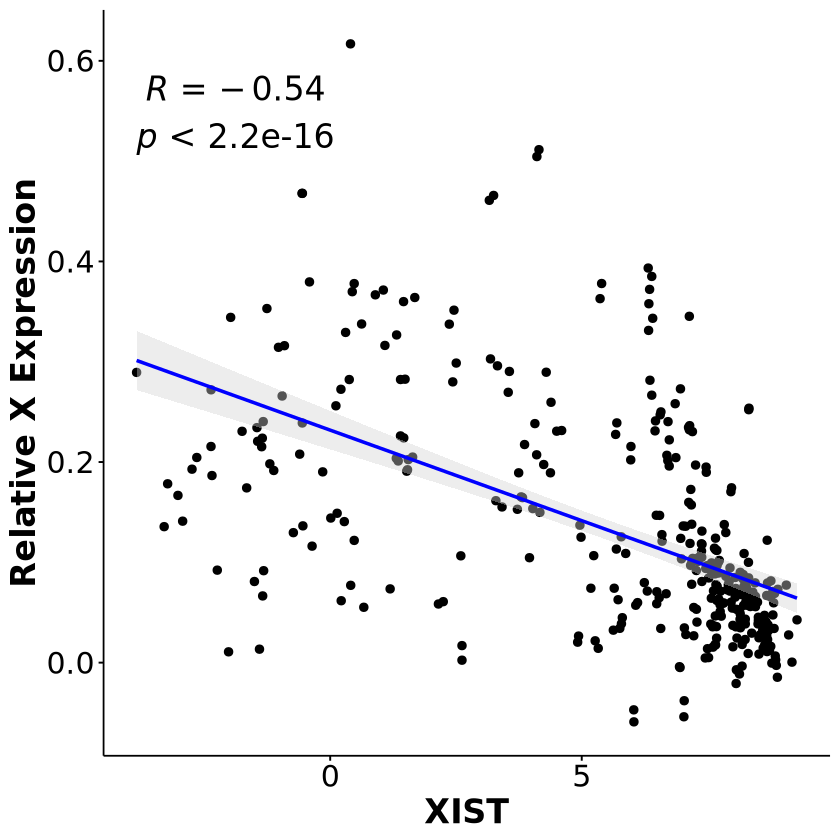

In [24]:
plot_scatter("XIST")